# Gym Members Exercise Dataset

## Import dependencies

In [1]:
import os

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
csv_path = os.path.join('./input', 'gym_members_exercise_tracking.csv')
df = pd.read_csv(csv_path)

In [3]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [4]:
sample_count = len(df)
sample_count

973

## Print out a summary

In [5]:
def summarize(df: pd.DataFrame):
    summarized_df = pd.DataFrame(df.dtypes, columns=['data_type'])
    
    summarized_df['missing_values'] = df.isnull().sum()
    summarized_df['duplicates'] = df.duplicated().sum()
    summarized_df['unique'] = df.nunique().sum()

    descriptive_summary = pd.DataFrame(df.describe(include='all').transpose())

    summarized_df['average'] = descriptive_summary['mean']
    summarized_df['min'] = descriptive_summary['min']
    summarized_df['max'] = descriptive_summary['max']
    summarized_df['std_dev'] = descriptive_summary['std']

    summarized_df['top'] = descriptive_summary['top']
    summarized_df['freq'] = descriptive_summary['freq']

    summarized_df = summarized_df.fillna(0)

    return summarized_df

In [6]:
summarize(df)

,data_type,missing_values,duplicates,unique,average,min,max,std_dev,top,freq
Age,int64,0,0,2554,38.683453,18.00,59.00,12.180928,0,0
Gender,object,0,0,2554,0.000000,0.00,0.00,0.000000,Male,511
Weight (kg),float64,0,0,2554,73.854676,40.00,129.90,21.207500,0,0
Height (m),float64,0,0,2554,1.722580,1.50,2.00,0.127720,0,0
Max_BPM,int64,0,0,2554,179.883864,160.00,199.00,11.525686,0,0
Avg_BPM,int64,0,0,2554,143.766701,120.00,169.00,14.345101,0,0
Resting_BPM,int64,0,0,2554,62.223022,50.00,74.00,7.327060,0,0
Session_Duration (hours),float64,0,0,2554,1.256423,0.50,2.00,0.343033,0,0
Calories_Burned,float64,0,0,2554,905.422405,303.00,1783.00,272.641516,0,0
Workout_Type,object,0,0,2554,0.000000,0.00,0.00,0.000000,Strength,258


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

## Data Visualization

### Genders distribution

In [12]:
gender_count = df['Gender'].value_counts()
gender_count

Gender
Male      511
Female    462
Name: count, dtype: int64

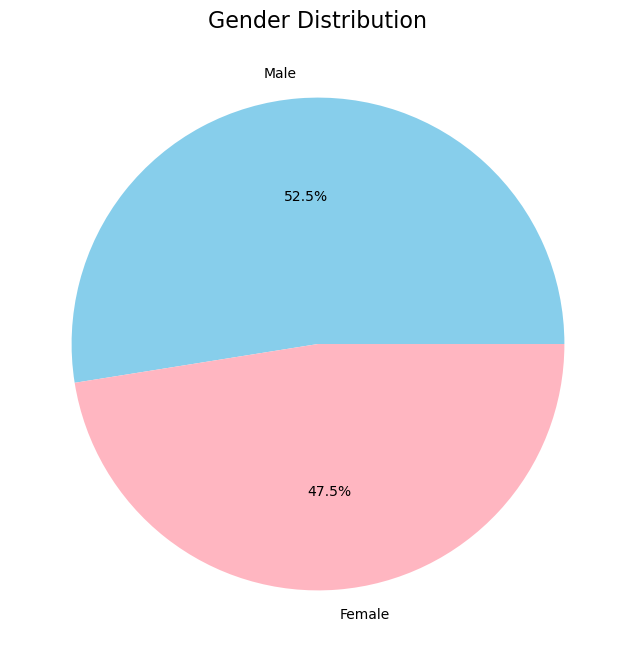

In [28]:
plt.figure(figsize=(8, 8))
plt.pie(gender_count, labels=gender_count.index, autopct="%1.1f%%", colors=['skyblue', 'lightpink'])
plt.title('Gender Distribution', fontsize=16)
plt.show()

### BMI Analysis

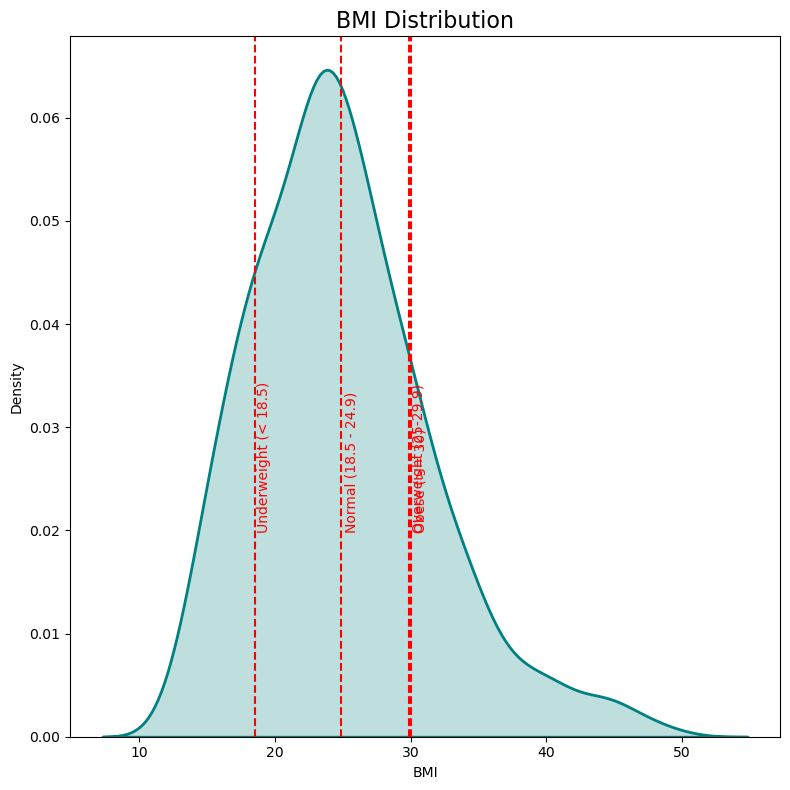

In [57]:
plt.figure(figsize=(8, 8))
plt.title('BMI Distribution', fontsize=16)

sns.kdeplot(data=df, x='BMI', shade=True, color='teal', linewidth=2)

bmi_categories = {
    "Underweight (< 18.5)": 18.5,
    "Normal (18.5 - 24.9)": 24.9,
    "Overweight (25-29.9)": 29.9,
    "Obese (>= 30)": 30,
}

for category, threshold in bmi_categories.items():
    plt.axvline(x=threshold, linestyle='dashed', color='red')
    plt.text(threshold + 0.2, 0.02, category, rotation=90, fontsize=10, color='red')

plt.tight_layout()
plt.show()

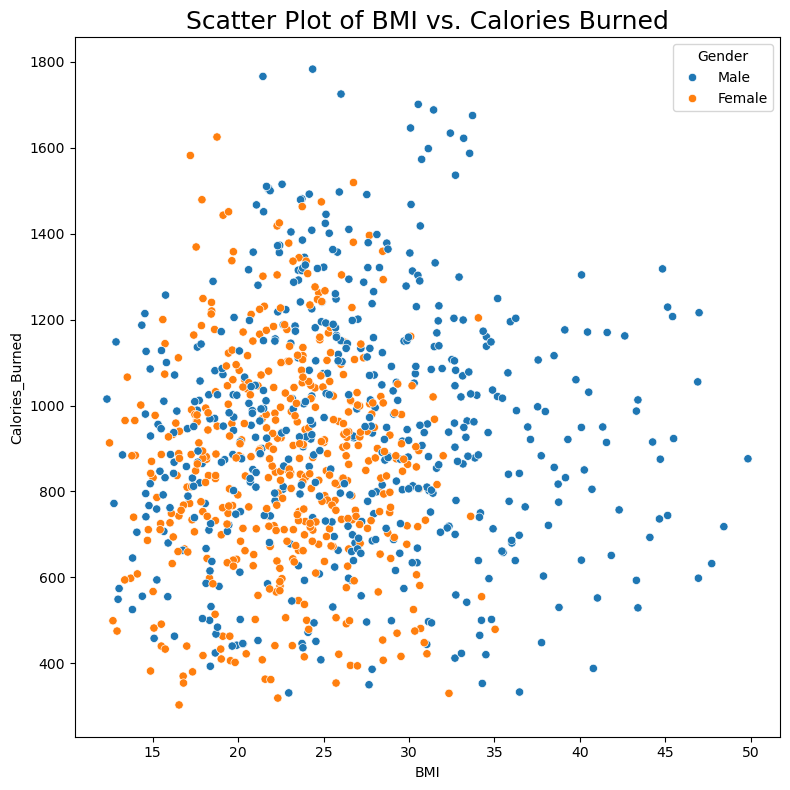

In [72]:
plt.figure(figsize=(8, 8))

plt.title('Scatter Plot of BMI vs. Calories Burned', fontsize=18)

sns.scatterplot(data=df, x='BMI', y='Calories_Burned', hue='Gender', alpha=1)

plt.tight_layout()
plt.show()

In [75]:
correlation = df[['BMI', 'Workout_Frequency (days/week)', 'Experience_Level']].corr()
correlation

,BMI,Workout_Frequency (days/week),Experience_Level
BMI,1.000000,0.001645,0.016031
Workout_Frequency (days/week),0.001645,1.000000,0.837079
Experience_Level,0.016031,0.837079,1.000000


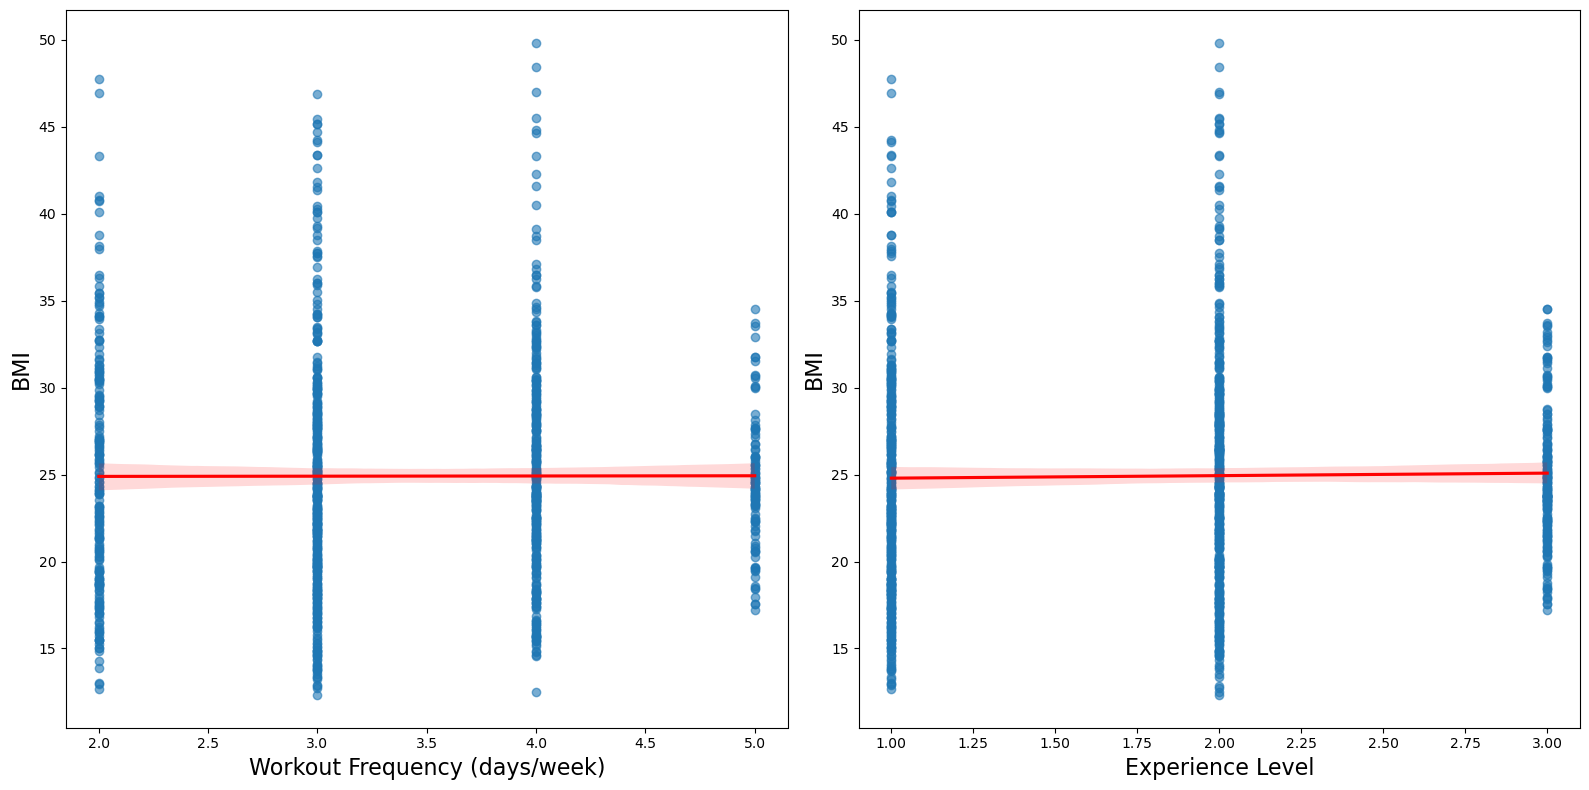

In [91]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Scatter plot for BMI vs. Workout_Frequency
sns.regplot(data=df, x='Workout_Frequency (days/week)', y='BMI', scatter_kws={'alpha': 0.6}, line_kws={'color':'red'}, ax=axes[0])
axes[0].set_xlabel('Workout Frequency (days/week)', fontsize=16)
axes[0].set_ylabel('BMI', fontsize=16)

# Scatter plot for BMI vs. Experience_Level
sns.regplot(data=df, x='Experience_Level', y='BMI', scatter_kws={'alpha': 0.6}, line_kws={'color':'red'}, ax=axes[1])
axes[1].set_xlabel('Experience Level', fontsize=16)
axes[1].set_ylabel('BMI', fontsize=16)

plt.tight_layout()
plt.show()